# MD simulations exercise

# Aims 

The aim for this exercise is to learn how to look at MD simulations, and how to quantitate some of the dynamic informations observed.

Our model protein will be insulin, primarily due to its small size and multiple conformational states that are reachable by short simulations. 

We will be investigating the dynamics of insulin hormone via 

 1. visualising the MD simulations (in PyMoL)

 2. analysing the dynamic properties of insulin in MD simulations (in Python)

## Preparation

- read this notebook before the exercise

- if you are feeling particularly enthusiastic, you can also try running the notebook and answering the questions.

## Practical details

All the material is available on the [AU-MBG Github page](https://github.com/au-mbg/protein_science/). You should first familiarise yourself with the content of the repository (you might find README.md helpful for that purpose). 

Then, download the repository by:

1. Opening a Terminal window (Ctrl + Alt + T)

2. ```git clone https://github.com/au-mbg/protein_science.git ~/Desktop/```

The folder called ```protein_science``` should now be located on your Desktop.

3. ```cd ~/Desktop/protein_science```

4. ```jupyter-notebook MD_Protein_Science.ipynb```


# 1) Visualisation

## Background

Insulin is a peptide hormone that regulates metabolism by promoting the absorption of glucose from the blood into the cells. Insulin binds to the extracellular portion of the insulin receptor, which then starts multiple signalling cascades that regulate various aspects of the cellular metabolism and promote glucose uptake. 

## Visualising the insulin structure

Insulin is a small protein ([Uniprot entry](https://www.uniprot.org/uniprotkb/P01308/entry)) consisting of 51 residues divided into two chains (chain A and B). The chains are interconnected by two disulfide bonds, and chain A has an additional intrachain disulfide bond. 

> Q: Visualise the structure of insulin (INS1.pdb) in Pymol. Is insulin a homo- or heterodimer?

```load INS1.pdb```

> Q: What residues form disulfide bonds?

The secondary structure of insulin is a combination of $\alpha$-helices and random coils, with a small proportion of $\beta$-sheets.

## Insulin conformation(s)

While insulin is relatively rigid in structure, is still visits several different conformations, and the movements are mainly related to the position of the unstructured random coil regions.    

Fun fact: The 'active' conformation of insulin is called the **T-state**, and it is characterized by a random coil of the N-terminus of chain B. This form is present as a monomer in solution and binds to the insulin receptor. However, insulin can also form hexameric complexes, <span style="color:RED">[SHOW PIC]</span>, in which case insulin is observed in an **R-state**, characterized by an $\alpha$-helix of the said terminus. 

> Open the second insulin structure (INS2.pdb). Do the two structures correspond to the T-state or the R-state? 

While the two conformations are similar, they differ in the relative placement of the unstructured termini. Both conformations are taken from the insulin receptor complex with insulin bound to two different binding sites (PDB code: 6PXV), where INS1 is interacting with Site 1, and INS2 with Site 2.

> Align the two structures using only C$\alpha$ atoms on chain A.

Hint: the *name* for C$\alpha$ atoms is *CA*.

> Note the qualitative differences between the two structures. (Hint: this will come in handy in the second part of the exercise)

## Visualising the MD trajectories 

Visualising MD simulations always requires **two** components: 

1) **a topology file**: often, a coordinate file with a ```.pdb``` extension.

2) **a trajectory file**: a large file (in a binary format) that contains the information about the position of each [atom] of each simulation [frame]. In our case, it can be recognised by the ```.xtc``` extension. The trajectory file does not contain any information about protein topology, atom types, residue types and numbering, or chains -- trajectories are therefore always loaded ONTO the topology (structure) file.

For this part of the exercise, we will be viewing the systems with solvent (```Insulin_w_solvent```)

> First, we will observe the whole simulation system. Load ```INS1_solvent.pdb``` into PyMOL. What are the components of the system?

> Marvel at the shape of the simulation box.

Although the term "simulation box" invokes an image of a square or a rectangle, the simulation boxes are in practice often shaped as rhombic dodecahedrons. It is a literal 'corner-cutting' measure, as this box shape is more economic and allows us to simulate fewer solvent molecules.

> Load the trajectory ```(.xtc)``` file with the same name onto the structure file.

PyMOL understands file extensions (recognises ```.xtc``` as a trajectory file), and it loads the trajectory onto the structure file with the same name (that is, INS1). If the files are not named the same, the grouping can be made explicitly by: 

```load_traj traj.xtc, INS1```

> Play the video using the buttons in the lower right corner.

It might seem like insulin is anchored in the centre of the simulation box, but this is not the case. During the simulation, protein can freely diffuse around the simulation box (remember that beyond the boundaries, there are infinite periodic images of the same simulation box). In the postprocessing step, the periodic box is shifted so it always centers on the protein, which is what you are observing here. 

> How many frames are there in the simulation?

> The time step between each frame is 1 ns. How long is the simulation in total? 

> Remove the solvent to observe insulin.

Water: ```resn TIP3```

Na: ```name SOD```

Cl: ```name CLA```

```select water_salt, resn TIP3 or name SOD or name CLA```

> Fit the trajectory so it does not rotate or translate. The fit is performed only on the C$\alpha$ atoms. Play the simulation again. How does it look now?

```intra_fit INS1_solvent & name CA```

> Repeat the same procedure for INS2.

> Note down some observations about the simulations. How are they similar and how do they differ? What parts of insulin are moving the most?

# 2) Analysis

By this point, you have developed an intuition about MD in general and our insulin simulations in particular. 

While a picture speaks a thousand words, and a video speaks at least (1000 words) x *N*(frames), the visual observations are often meaningless without quantification. We will, therefore, proceed with some data analysis on our simulation trajectories.  


## Aims

In the next part, we will cover some basic analyses you can perform on your simulations:

- root-mean-square-deviation (RMSD)
- root-mean-square-fluctuation (RMSF)
- measure of distances of your choice
- (if the time allows) secondary structure quantification

In the process, we will learn how to:

1) load and use Python packages
2) load the trajectories into the Python environment
3) Plot the variables
4) Make atom selections

Ultimately, we will address:

a) the problem of (over)abundance of data, and how to get around it

b) how your choices of variables are dependent on the research question you are trying to answer

c) (if time allows) the 'solutions' to the problem of multidimensionality

### Loading packages

The core Python functionalities are versatile, but limited in terms of specialised functions or data structures that we need if we want to (quickly) analyse our data.

We can therefore use special **libraries** that contain **packages** and **modules** of Python code. The libraries are loaded with:

 ```import [library_name] as [nickname]```

The individual packages within the library can be loaded with:

```import [library_name].[package_name] as [nickname]```

The modules within an individual package within a library are loaded with:

```from [library_name].[package_name] import [module_name(s)]```

### Specific imports

1. ```mdtraj```: a package for loading and analysing MD simulations data. Documentation available [here](https://mdtraj.org/1.9.4/index.html).

2. ```numpy```: a very frequently used package that deals with datasets (in a form of multidimensional arrays).

3. ```matplotlib```: general data visualisation


In [3]:
# Import libraries
import mdtraj as md
import numpy as np

# Import packages
import matplotlib.pyplot as plt

# Import modules
from matplotlib.colors import ListedColormap, BoundaryNorm

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Data load

In the same way that we had to combine a topology file and a trajectory file to view the simulations, we have to do the same to load them into the Python environment. 

Mdtraj has several load functions that can be used to load the data into the Python environment.

```md.load_pdb```
  - a function that loads the .pdb file
  - ```md``` is the nickname for the mdtraj library. We need to specify that the function ```load_pdb``` is to be sourced out of this library.
  - required parameter: ```filename```, pointing to the PDB file

```md.load```
- a function that loads the MD trajectory (.xtc file format) and requires a topology file.
- required parameters: a trajectory file + a topology file


In [8]:
# Load trajectory 1

# Paths to the files, relative to the location of the Jupyter notebook
top_path_1="Insulin/INS1.pdb"
traj_path_1="Insulin/INS1.xtc"

# Loading the pdb file
pdb_1 = md.load_pdb(top_path_1)

# Loading the trajectory
t_1 = md.load(traj_path_1, top = top_path_1)

print(t_1)

<mdtraj.Trajectory with 99 frames, 786 atoms, 51 residues, and unitcells>


In [13]:
# Load trajectory 2

# Complete the code
top_path_2=""
traj_path_2=""

pdb_2 = md.load_pdb()
t_2 = md.load()

print(t_2)

<mdtraj.Trajectory with 99 frames, 786 atoms, 51 residues, and unitcells>


# The (over)abundance of data

After running MD simulations, the researcher, in principle, has information about the position of every single particle of a system for every single frame of the simulation. For a regularly-sized system (~100,000 atoms) that was simulated for 1 $\micro$s, and where frames were saved each ns (1000 frames in total), the product is a 3-dimensional matrix [coordinates, atoms, frames] of size (3, 100000, 1000). This matrix contains 30 million values - which, as you can imagine, is hardly interpretable!

This problem of data (over)abundance is not trivial to solve, and the approach differs greatly based on the research question one is trying to answer. For example, if we are focusing on quantifying the conformational changes in a protein, we are probably not going to be interested in water-water interactions ~5 Å away from our protein. Instead, the measures that help us quantify intramolecular motions of the protein are probably going to be much more interesting to us. 

A common approach is the "funnel" method, where one starts with **global** analyses, where the dynamic information of a molecule of interest (i.e., protein) is described within a single measure.

- e.g., RMSD, radius of gyration, solvent accessible surface area, ...

- **advantage**: manageable to understand

- **disadvantage**: often a degenerate variable - meaning that multiple states correspond to the same value

After getting a 'hunch' about the behaviour of the molecule of interest, one can continue with more precise, **local** analyses:

- e.g., RMSF, secondary structure, measures of specific residue distances/angles/dihedrals..

- **advantage**: per-residue or per-atom level of detail that is easier to interpret

- **disadvantage**: The calculations often produce multidimensional datasets (>2) that are difficult to plot; in practice, researchers are often required to specify a narrow subset of features of interest

    - In order to perform the calculation on a reasonably-sized subset, you already need to know something about your system!

## Root-mean-square deviation (RMSD) 

Root-mean-square deviation (RMSD) is a common starting point for any MD simulation analysis. It is a measure of deviation of a structure from the reference structure. It is calculated **for each frame of the simulation** as

$$
RMSD = \sqrt{ \frac{1}{n} \sum_{i=1}^{n}{(||x_i-x_R||)^2} }
$$

where $n$ is the number of atoms of a selection, $x_i$ is the position of each atom in a given simulation frame, and $x_R$ is the position of a reference atom. Therefore, the RMSD value reflects the deviation of **all** atoms in the selection. In practice, it is often calculated only for C$\alpha$ atoms, as backbone displacement is more meaningful than the displacement of sidechains (exceptions apply).

### The choice of a reference

The choice of a reference should always be reasoned against the research question we want to answer. 

> Consider the following two research questions. In practice, you probably want to know the answer to both.
 
1) How much is a protein backbone displaced over the simulation trajectory?

Note, this question is often asked to assess if the protein has reached its 'equilibrium' conformation in the simulation. In practice, the value often rises very steeply at the beginning and levels off after a while. When it reaches the plateau, the protein conformation is reasonably stable.

> In this case, we want to know how much the protein atoms get displaced over a simulation, **as compared to the starting state**. What should the reference be?

In [14]:
# Calculating the rmsd value for the two trajectories

rmsd_1 = md.rmsd(t_1, reference = pdb_1)

rmsd_2 = md.rmsd(t_2, reference = pdb_2)


In [15]:
# Extracting the time points from the trajectory. This will be useful for plotting.

t_1.time # In ps
time_ns = t_1.time / 1000 # Converting the data to ns
print(time_ns)

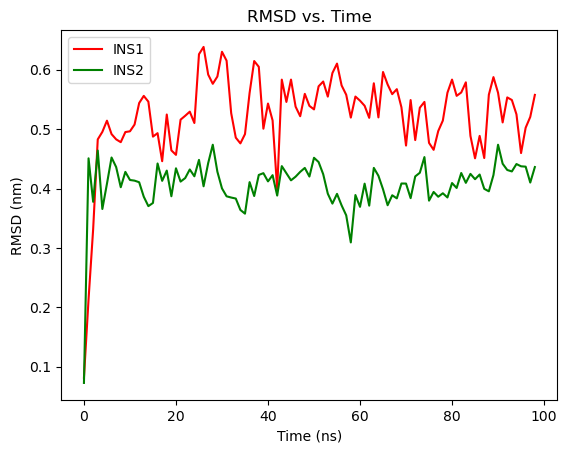

In [16]:
# Plotting the RMSD value (in nm) for each simulation time point (in ns).

# Feel free to play around with the axis titles, colour choices, and legend labels.

fig, ax = plt.subplots()
ax.plot(time_ns, rmsd_1, color = "red")
ax.plot(time_ns, rmsd_2, color = "green")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD (nm)")
ax.set_title("RMSD vs. Time")
ax.legend(["INS1", "INS2"])
plt.show()

> What does the plot tell us about our simulations? Have they reached an equilibrium? Which simulation is "more different" from its starting structure?

2) Do the states visited in trajectory 1 resemble the states visited in trajectory 2?

> In this case, we want to compare the two simulations. What should we use as a reference?

In [ ]:
# Insert here a piece of code that will calculate the RMSD value with a reference of your choice. 

rmsd_1 = md.rmsd()
rmsd_2 = md.rmsd()

In [ ]:
# Plot it 
fig, ax = plt.subplots()
ax.plot(time_ns, rmsd_1, color = "red")
ax.plot(time_ns, rmsd_2, color = "green")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("RMSD (nm)")
ax.set_title("Insert informative title here")
ax.legend(["INS1", "INS2"])
plt.show()

## Root-mean-square fluctuation (RMSF)

Root-mean-square fluctuation (RMSF) is a measure of fluctuation of each individual residue (defined by all its atoms, subset of atoms, or C$\alpha$) over a simulation. 

It is calculated by the following expression,
$$
RMSF_{i} = \sqrt { \frac{1}{T} \sum_{t=1}^{T} (x_{i} - \overline{x}_{i})^2} 
$$

where $T$ is the number of simulation frames, $x_i$ is the position of the particle $i$, and $\overline{x}_{i}$ is the average position of the same particle.

RMSF has a deceptively similar name and expression to RMSD, but the two produce very different results. While RMSD is a time-series measure, RMSF is a value that includes the time component in its calculation, making it time-independent. Instead, RMSF measures the fluctuations on a per-particle (in practice, per-residue) basis, which is not the case for RMSD.

Notice as well that RMSF is calculated by using the **average** position of each residue, rather than the reference position. However, the function still requires the reference -- this is because the structures across frames need to be aligned before proceeding with the calculation.

In practice, RMSF is a measure of flexibility, and low RMSF values indicate rigid parts of the structure, while high RMSF values indicate flexible parts of the structure.

In [17]:
rmsf_1 = md.rmsf(t_1, reference = pdb_1)
rmsf_2 = md.rmsf(t_2, reference = pdb_2)


In [22]:
# Creating a list with the numbered residues. This will be useful for plotting.

resid_index = list(range(1,pdb_1.topology.n_residues+1)) 
print(resid_index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


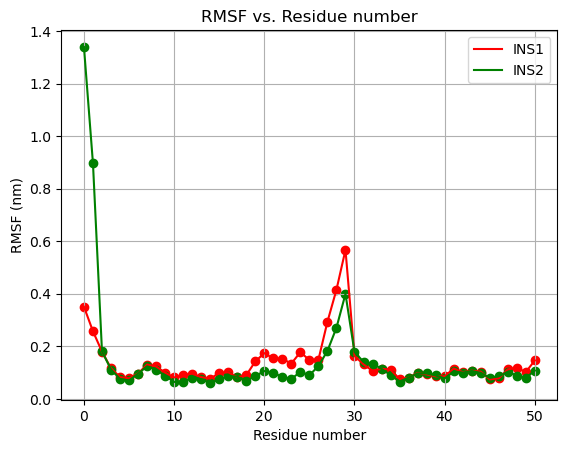

In [19]:
fig, ax = plt.subplots()
ax.plot(resid_index, rmsf_1, color = "red")
ax.scatter(resid_index, rmsf_1, color = "red", label = '_nolegend_')
ax.plot(resid_index, rmsf_2, color = "green")
ax.scatter(resid_index, rmsf_2, color = "green", label = '_nolegend_')
ax.set_xlabel("Residue number")
ax.set_ylabel("RMSF (nm)")
ax.set_title("RMSF vs. Residue number")
ax.legend(["INS1", "INS2"])
ax.grid()


> What can RMSF measure tell us about the secondary structure of the protein?

## Distance measurements

Now that we have (some) information about the motions of insulin, we might want to quantify the conformational change using an easy-to-understand measure (e.g., a distance, an angle, a dihedral). 

Calculating all distances for all frames between all atoms in insulin is possible, but not practical - this calculation will generate a matrix of size (100, 786, 786) hosting 61779600 data points. Instead, we need to narrow the calculation to only a couple of distances between the atom pairs, which will help us quantify the conformational change. 

> Look again at the simulations. What would be promising atom pairs to choose? 

### Atom selection

> First you need to choose your atoms of interest. You should select only TWO atoms per group. Try out multiple selections and see if you get only two atoms as an output.  

In [ ]:
distance_pairs = [pdb_1.topology.select("(resid 1 and name N) or (resid 2 and name CA")] # A nonsensical selection, you should change it!
print(distance_pairs_1)

In [25]:
# Calculating the distance for each simulation trajectory

dist_1 = md.compute_distances(t_1, distance_pairs)
dist_2 = md.compute_distances(t_2, distance_pairs)

[array([171, 411])]
[array([171, 411])]


NameError: name 'time_ns' is not defined

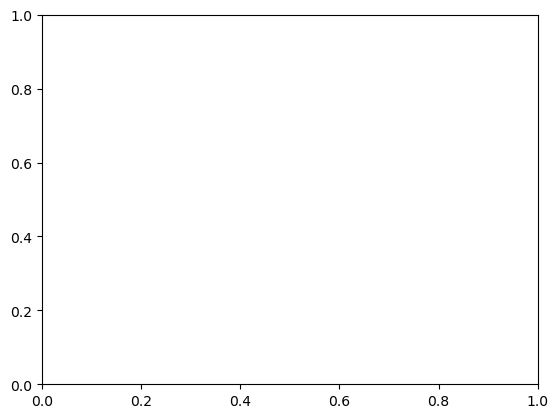

In [23]:
fig, ax = plt.subplots()
ax.plot(time_ns, dist_1, color = "red")
ax.plot(time_ns, dist_2, color = "green")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Distance (nm)") # Specify what atoms were used for calculating the distance
ax.set_title("Distance vs time")
ax.legend(["INS1", "INS2"])
ax.grid()


# Extracurricular activity

We will almost certainly not have time to do this.

In [20]:
dssp_1 = md.compute_dssp(t_1, simplified = True)
dssp_2 = md.compute_dssp(t_2, simplified = True)


Text(0.5, 1.0, 'DSSP Secondary Structure Heatmap')

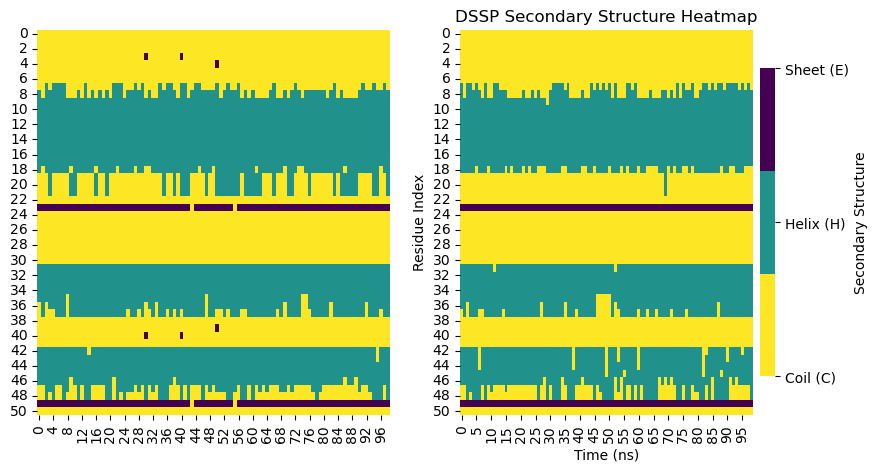

In [21]:
mapping = {'C':0,
           'H':1,
           'E':2}
numeric_dssp_1 = np.vectorize(mapping.get)(dssp_1)
numeric_dssp_2 = np.vectorize(mapping.get)(dssp_2)

# Define discrete colormap
colors = ['#fde725', '#21918c', '#440154']  # H, E, C
cmap = ListedColormap(colors)
fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0] = sns.heatmap(numeric_dssp_1.T, cmap = cmap, ax=axes[0], cbar=False,
                      cbar_kws={
        'ticks': [0, 1, 2],  # positions of labels
        'label': 'Secondary Structure',
        'shrink': 0.8,
        'pad': 0.02
    })

axes[1] = sns.heatmap(numeric_dssp_2.T, cmap = cmap, ax=axes[1], cbar_kws={
        'ticks': [0, 1, 2],  # positions of labels
        'label': 'Secondary Structure',
        'shrink': 0.8,
        'pad': 0.02
    })

# Custom tick labels
cbar = plt.gca().collections[0].colorbar
cbar.set_ticklabels(['Coil (C)', 'Helix (H)', 'Sheet (E)'])

plt.xlabel('Time (ns)')
plt.ylabel('Residue Index')
plt.title('DSSP Secondary Structure Heatmap')




In [22]:
def SumSS(dssp_df, ss_name):
  ss_element_sum_list = []
  for frame in dssp_df:
    ss_element_sum = 0
    for res in frame:
      if res == ss_name:
        ss_element_sum += 1
    ss_element_sum_list.append(ss_element_sum)
  return(ss_element_sum_list)


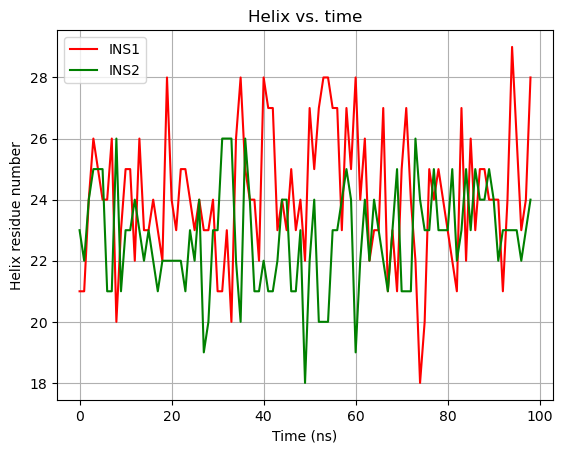

In [24]:

fig,ax = plt.subplots()
ax.plot(time_ns, SumSS(dssp_1, "H"), color = "red")
ax.plot(time_ns, SumSS(dssp_2, "H"), color = "green")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("Helix residue number")
ax.set_title("Helix vs. time")
ax.legend(["INS1", "INS2"])
ax.grid()
